<a href="https://colab.research.google.com/github/subi-147/TimeSeries_lab/blob/main/TSA_EX_NO_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


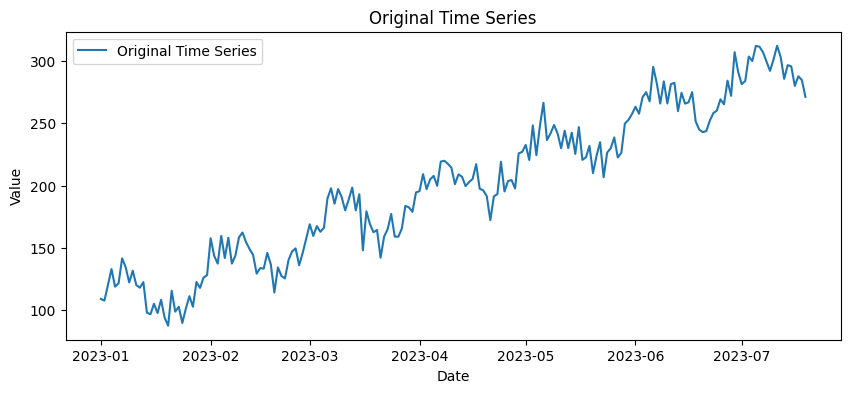

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - loss: 0.2229 - val_loss: 0.1347
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0291 - val_loss: 0.0411
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0360 - val_loss: 0.0093
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0088 - val_loss: 0.0478
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0144 - val_loss: 0.0351
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0110 - val_loss: 0.0100
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0098 - val_loss: 0.0076
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0091 - val_loss: 0.0143
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0087 - val_loss: 0.0211
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0091 - val_loss: 0.0144
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0077 - val_loss: 0.0085
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0069 - val_loss: 0.0082


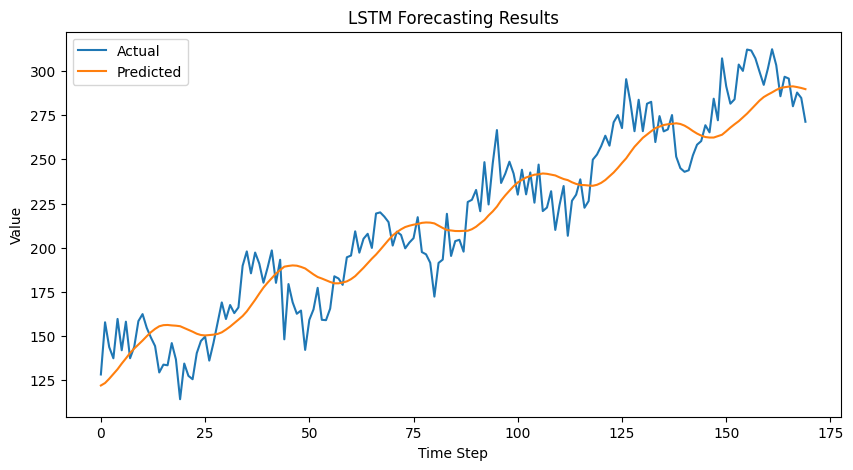

In [ ]:
file_path = '/content/drive/MyDrive/time_series_lstm.csv'

# Load data
df = pd.read_csv(file_path)
df.columns = ['Date', 'Value']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot original data
plt.figure(figsize=(10, 4))
plt.plot(df, label='Original Time Series')
plt.title("Original Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# === Step 2: Scale and Create Sequences ===
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Value']])

# Function to generate input sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30  # number of previous time steps
X, y = create_sequences(scaled_data, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# === Step 3: Build the LSTM Model ===
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(32),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# === Step 4: Train the Model ===
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# === Step 5: Forecast and Visualize ===
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y.reshape(-1, 1))

# Plot predicted vs actual
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('LSTM Forecasting Results')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()